# Spam SMS Detection (Naive Bayes)
### by Diptorshi Tripathi, VIT-AP University

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud

In [10]:
# Loading the dataset.
df = pd.read_csv('spam.csv', encoding = 'latin-1')
print(df.head())
label_counts = df['v1'].value_counts()
print(label_counts)

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
v1
ham     4825
spam     747
Name: count, dtype: int64


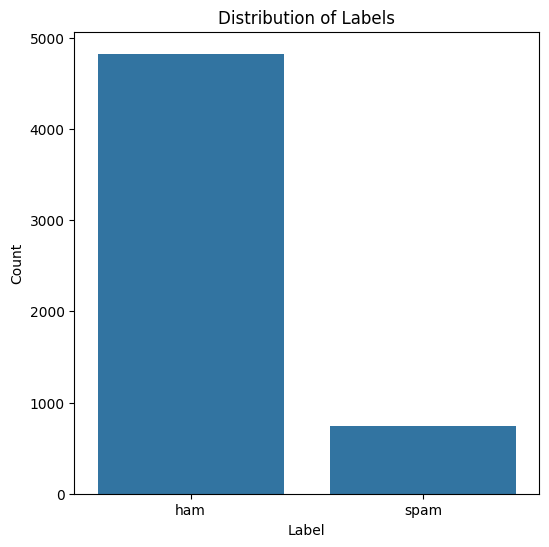

In [11]:
# Visualizing the data.
plt.figure(figsize=(6,6))
sns.countplot(x='v1', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

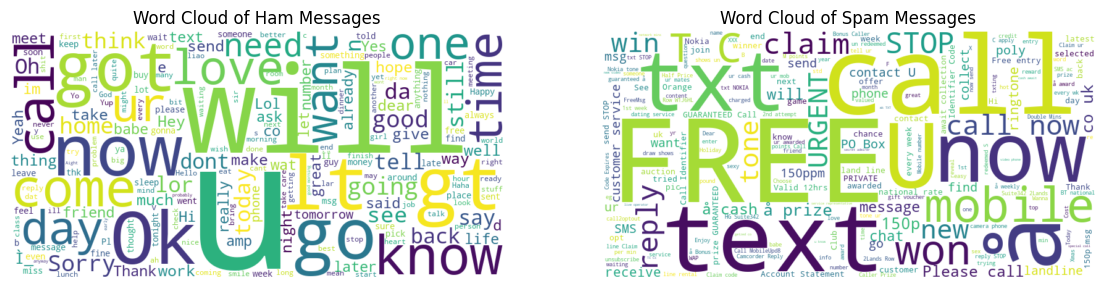

In [13]:
ham_messages = df[df['v1'] == 'ham']['v2']
spam_messages = df[df['v1'] == 'spam']['v2']

# Differentiating between Ham and Spam messages.
ham_combined = ' '.join(ham_messages)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_combined)
spam_combined = ' '.join(spam_messages)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_combined)

# Plotting WordClouds.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Ham Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Spam Messages')
plt.axis('off')
plt.show()

In [14]:
# Preprocessing the data.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['v2'])
y = df['v1']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Naive Bayes classifier.
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluating the model and displaying confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.97847533632287
Confusion Matrix:
[[952  13]
 [ 11 139]]


In [15]:
def predictspam(text):
    text_vectorized = vectorizer.transform([text])
    prediction = clf.predict(text_vectorized)
    return prediction[0]

# Sample usage.
sample_text = "Congratulations! You've won a free trip. Click here to claim your prize."
print("Sample Text:", sample_text)
print("Prediction:", predictspam(sample_text))


Sample Text: Congratulations! You've won a free trip. Click here to claim your prize.
Prediction: spam


In [17]:
# Sample usage part 2.
sample_text2 = "Hey man, how you doing today?"
print("Sample Text 2:", sample_text2)
print("Prediction:", predictspam(sample_text2))

Sample Text 2: Hey man, how you doing today?
Prediction ham


# Conclusion
### The given dataset has been successfully analysed using Naive Bayes, and the model gives us an incredible accuracy of 97.8%. Furthermore, the trained model can correctly predict whether a message is considered spam or not.